In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_valid = pd.read_csv('../data/val.csv')

In [3]:
# Encode categorical features
df_train_encoded = df_train.copy()
categorical_features = ['Gender', 'H_Cal_Consump',
 'Alcohol_Consump', 'Smoking',
 'Food_Between_Meals', 'Fam_Hist',
 'H_Cal_Burn', 'Phys_Act', 'Transport']
for feature in categorical_features:
 le = LabelEncoder()
 df_train_encoded[feature] = le.fit_transform(df_train_encoded[feature])

df_valid_encoded = df_valid.copy()
for feature in categorical_features:
    le = LabelEncoder()
    df_valid_encoded[feature] = le.fit_transform(df_valid_encoded[feature])

In [4]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(df_train_encoded.drop('Body_Level', axis=1), df_train_encoded['Body_Level'])

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']

# Print the best value of k
print(best_k)

1


In [5]:
X_train = df_train_encoded.drop('Body_Level', axis=1)
y_train = df_train_encoded['Body_Level']

X_valid = df_valid_encoded.drop('Body_Level', axis=1)
y_valid = df_valid_encoded['Body_Level']

In [45]:
# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_valid)

# Print the accuracy score
print('Accuracy score: ', knn.score(X_valid, y_valid))

Accuracy score:  0.7702702702702703


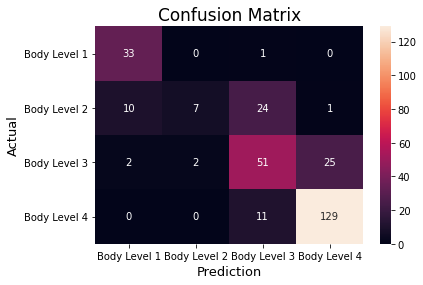

In [7]:
# Print the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
labels = list(set(y_valid))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [8]:
# Try out all the other Datasets in class_imbalance folder
x_train_undersampled = pd.read_csv('../data/class_Imbalance/X_under_sampled_no_relationship.csv')
y_train_undersampled = pd.read_csv('../data/class_Imbalance/y_under_sampled_no_relationship.csv')

x_train_oversampled = pd.read_csv('../data/class_Imbalance/X_over_sampled_no_relationship.csv')
y_train_oversampled = pd.read_csv('../data/class_Imbalance/y_over_sampled_no_relationship.csv')

x_train_smotenc = pd.read_csv('../data/class_Imbalance/X_SMOTENC_no_relationship.csv')
y_train_smotenc = pd.read_csv('../data/class_Imbalance/y_SMOTENC_no_relationship.csv')

y_train_smotenc = y_train_smotenc.rename(columns={'Body_Level_Num': 'Body_Level'})
y_train_smotenc['Body_Level'] = y_train_smotenc['Body_Level'].map({1: 'Body Level 1', 2: 'Body Level 2', 3: 'Body Level 3', 4: 'Body Level 4'})


x_train_smote_with_importance = pd.read_csv('../data/class_Imbalance/X_SMOTE_with_importance.csv')
y_train_smote_with_importance = pd.read_csv('../data/class_Imbalance/y_SMOTE_with_importance.csv')

y_train_smote_with_importance = y_train_smote_with_importance.rename(columns={'Body_Level_Num': 'Body_Level'})

y_train_smote_with_importance['Body_Level'] = y_train_smote_with_importance['Body_Level'].map({1: 'Body Level 1', 2: 'Body Level 2', 3: 'Body Level 3', 4: 'Body Level 4'})


In [9]:
# Encode categorical features
x_train_undersampled_encoded = x_train_undersampled.copy()
x_train_oversampled_encoded = x_train_oversampled.copy()
x_train_smotenc_encoded = x_train_smotenc.copy()
x_train_smote_with_importance_encoded = x_train_smote_with_importance.copy()

for feature in categorical_features:
    le = LabelEncoder()
    x_train_undersampled_encoded[feature] = le.fit_transform(x_train_undersampled_encoded[feature])
    x_train_oversampled_encoded[feature] = le.fit_transform(x_train_oversampled_encoded[feature])
    x_train_smotenc_encoded[feature] = le.fit_transform(x_train_smotenc_encoded[feature])
    x_train_smote_with_importance_encoded[feature] = le.fit_transform(x_train_smote_with_importance_encoded[feature])

In [44]:
# Create and fit the KNN classifier to the undersampled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_undersampled_encoded, y_train_undersampled)

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

# Print the accuracy score
print('Accuracy score /w undersampling: ', knn.score(X_valid, y_valid))

/home/jimbo/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score /w undersampling:  0.7364864864864865


In [37]:
# Create and fit the KNN classifier to the oversampled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_oversampled_encoded, y_train_oversampled)

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

# Print the accuracy score
print('Accuracy score /w oversampling: ', knn.score(X_valid, y_valid))

/home/jimbo/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score /w oversampling:  0.7702702702702703


In [35]:
# Create and fit the KNN classifier to the smotenc data
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_smotenc_encoded, y_train_smotenc)

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

# Print the accuracy score
print('Accuracy score /w smotenc: ', knn.score(X_valid, y_valid))

Accuracy score /w smotenc:  0.7736486486486487


/home/jimbo/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
# Create and fit the KNN classifier to the smote with importance data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_smote_with_importance_encoded, y_train_smote_with_importance)

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

# Print the accuracy score
print('Accuracy score /w smote with importance: ', knn.score(X_valid, y_valid))

/home/jimbo/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score /w smote with importance:  0.7668918918918919
